In [1]:
from astropy import constants as cons
from astropy import units as un
import numpy as np
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 50000
import matplotlib.pyplot as plt
import sys
plt.rcParams.update({'font.size': 20})

In [42]:
x, y, z, vx, vy, vz, m, d, u = np.genfromtxt('v500/out0001.sph.ascii', usecols= (0,1,2,3,4,5,6,7,8), unpack=True)

In [3]:
G = ((cons.G)/((un.R_sun.to(un.m)**3))*(un.M_sun.to(un.kg))*((1.8845e-2*86400)**2)).value

In [4]:
Mt = np.sum(m)

In [5]:
#xcm = np.sum(x*m) / Mt
#ycm = np.sum(y*m) / Mt
#zcm = np.sum(z*m) / Mt

xcm = x[np.argmax(d)]
ycm = y[np.argmax(d)]
zcm = z[np.argmax(d)]

print('The coords of the cm are: x = '+str(xcm)+'; y = '+str(ycm)+' and z = '+str(zcm))

The coords of the cm are: x = 54.09090017644724; y = -0.419876505195619 and z = -1.401061324906498


In [6]:
#vcmx = np.sum(vx*m) / Mt
#vcmy = np.sum(vy*m) / Mt
#vcmz = np.sum(vz*m) / Mt

vcmx = vx[np.argmax(d)]
vcmy = vy[np.argmax(d)]
vcmz = vz[np.argmax(d)]

print('The coords of the vcm are: vx = '+str(vcmx)+'; vy = '+str(vcmy)+' and vz = '+str(vcmz))

The coords of the vcm are: vx = 0.09715365671546083; vy = -0.001186425523607492 and vz = -0.002005127913616663


In [7]:
r = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(vx**2 + vy**2 + vz**2)

In [8]:
rcm = np.sqrt((x-xcm)**2 + (y-ycm)**2 + (z-zcm)**2)
vcm = np.sqrt((vx-vcmx)**2 + (vy-vcmy)**2 + (vz-vcmz)**2)

In [9]:
r-rcm

array([ 54.00957974, -52.46446168,  40.72268212, ..., -53.90450588,
       -42.57287534, -53.35315293])

In [10]:
v-vcm

array([ 0.09713132, -0.0941726 ,  0.07254824, ..., -0.09684679,
       -0.07716164, -0.09569472])

In [11]:
index = np.argsort(rcm)

In [13]:
R = rcm[index]
V = vcm[index]

U = u[index]
M = m[index]

In [14]:
Mencl = np.cumsum(M)

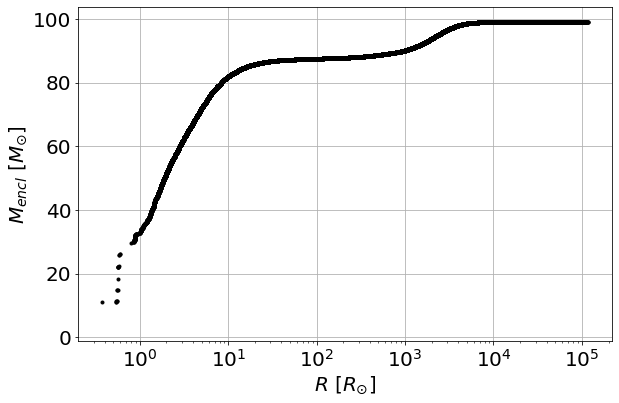

In [15]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,Mencl,'.k')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

In [16]:
E = V**2 - G*Mencl/R

/tmp/ipykernel_6927/2733028707.py:1: RuntimeWarning: divide by zero encountered in true_divide
  E = V**2 - G*Mencl/R


In [17]:
M

array([3.48962527e+00, 7.62253746e+00, 3.30814751e-02, ...,
       1.55178957e-11, 1.64277580e-11, 1.58874303e-11])

In [18]:
V**2

array([0.00000000e+00, 1.06157917e-08, 3.26620709e-08, ...,
       4.85270360e+04, 4.87472851e+04, 4.97735066e+04])

In [19]:
U

array([33.03378078,  0.        , 22.13836332, ..., 10.77350072,
       10.49513719,  8.28463077])

In [20]:
unb = np.where(E > 0)[0]

In [21]:
bun = np.where(E <= 0)[0]

In [22]:
percent = np.sum(M[unb])*100/Mt
percent

10.848632233313294

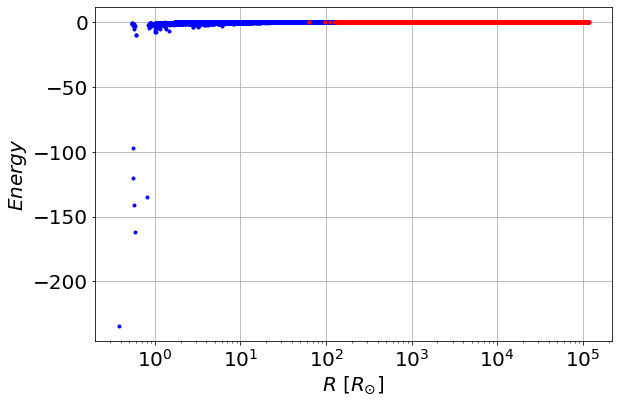

In [23]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,M*E,'.b')
plt.plot(R[unb],M[unb]*E[unb],'.r')
plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$Energy$")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

In [44]:
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R.txt', R)
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc.txt', Menc)
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R_un.txt', R[unb])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc_un.txt', M[unb])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_R_bn.txt', R[bun])
#np.savetxt('/tank0/ballone/coll_set/{}/'.format(folder)+name+'_Menc_bn.txt', M[bun])

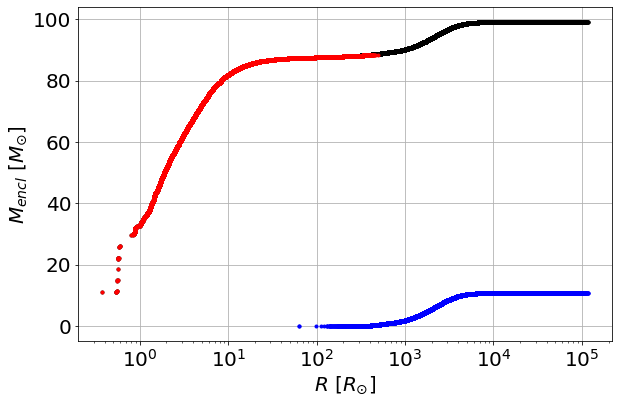

In [45]:
fig = plt.figure(figsize=(9, 6))

plt.plot(R,Mencl,'.k')
plt.plot(R[unb],np.cumsum(M[unb]),'.b')
plt.plot(R[bun],np.cumsum(M[bun]),'.r')

plt.xlabel("$R$ [$R_{\odot}$]")
plt.ylabel("$M_{encl}$ [$M_{\odot}$]")
plt.semilogx()
plt.grid()

plt.tight_layout()
plt.show()

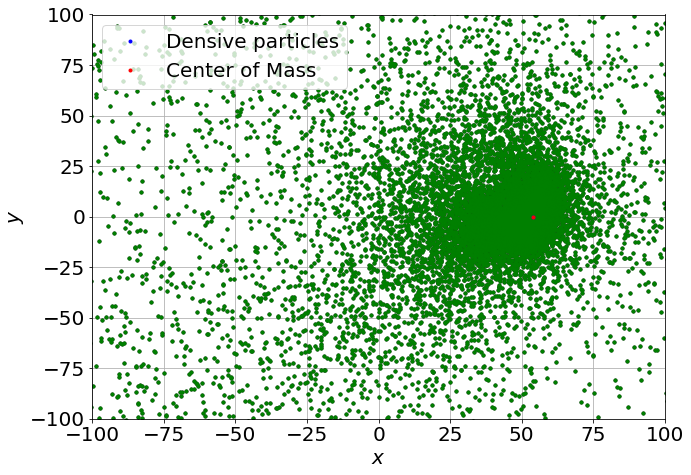

In [25]:
fig = plt.figure(figsize=(10, 7))

plt.plot(x,y,'.k')
plt.plot(x[unb],y[unb],'.g')
#plt.plot(x[np.argmax(m)],y[np.argmax(m)],'.g', label = 'Massive particles')
plt.plot(x[np.argmax(d)],y[np.argmax(d)],'.b', label = 'Densive particles')
plt.plot(xcm,ycm,'.r', label='Center of Mass')


plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()